#### Импорт необходимых библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Класс для клетки

In [2]:
class Cell:
    def __init__(self, ro0=1, s0=1):
        self._ro0 = ro0
        self._s0 = s0
    
    def jump(self, ro):
        angle = 2*np.pi*(np.random.random_sample()-0.5)
        if ro < self._ro0:
            self._s0 = self._s0 * self._f
            self._ro0 = ro
            return self._s0, angle
        else:
            self._s0 = self._s0 / self._f
            self._ro0 = ro
            return self._s0, angle
    
    def SetChange(self, f):
        self._f = f

#### Функция благоприятности среды

In [3]:
def RO(x,y):
    return x

#### Исходный график благоприятности

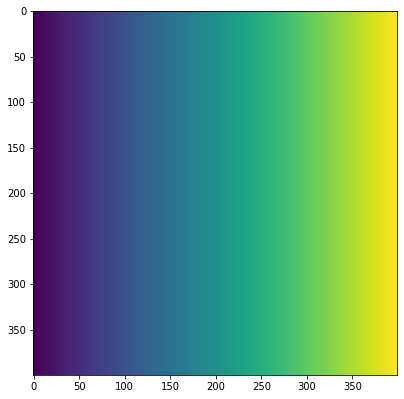

In [4]:
figureSizeConst = (13, 6.7)
plt.figure(figsize=figureSizeConst)
mapsize = 400
x = y = np.linspace(0, mapsize, mapsize)
z = np.array([RO(i, j) for j in y for i in x])
Z = z.reshape(mapsize, mapsize)
plt.imshow(Z, interpolation='bilinear')
plt.show()

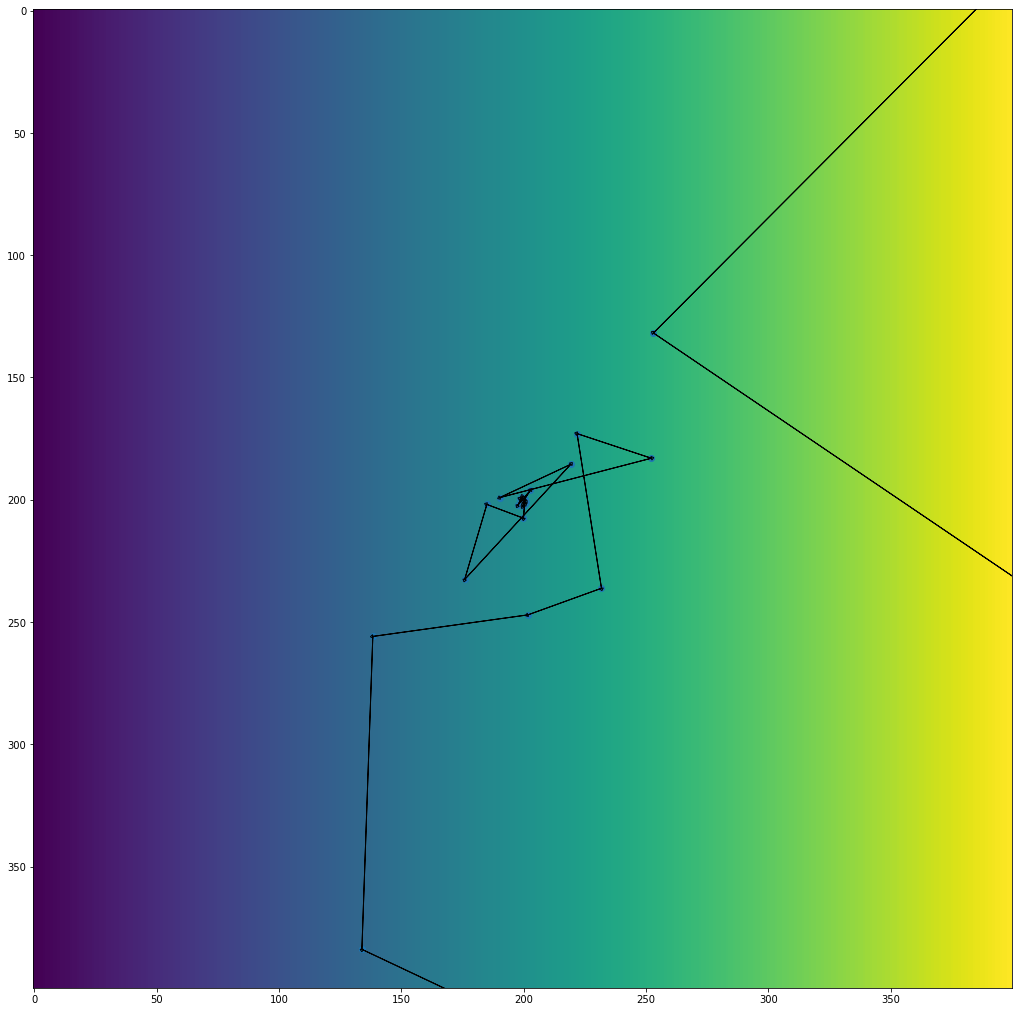

In [5]:
mapsize = 400

ImmaCell = Cell()

# Устанавливаем значение для изменения шага
ImmaCell.SetChange(2)

# Генерация массива положений клетки
x0, y0 = mapsize/2, mapsize/2
stepx, stepy = [], []
numOfJumps = 100
for i in range(numOfJumps):
    stepx.append(x0)
    stepy.append(y0)
    s, angle  = ImmaCell.jump(RO(x0, y0))
    #print('Move %f to angle %f pi' %(s, angle))
    x0, y0 = x0 + s * np.sin(angle), y0 + s * np.cos(angle)
    #print('New point (%f, %f)' % (x0, y0))

# График
figureSizeConst = (18, 18)
plt.figure(figsize=figureSizeConst)
x = y = np.linspace(0, mapsize, mapsize)
z = np.array([RO(i, j) for j in y for i in x])
Z = z.reshape(mapsize, mapsize)

sequence = np.arange(10)
plt.scatter(stepx, stepy)
for i in range(stepx.__len__())[:-1]:
    plt.arrow(stepx[i], stepy[i], stepx[i+1] - stepx[i], stepy[i+1] - stepy[i], head_length=1.0, head_width=1.5)
plt.imshow(Z)
plt.show()